In [1]:
DATASET_PATH = "..\\data\\raw\\heart_cleveland_upload.csv"

In [2]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.000,54.542,9.050,29.000,48.000,56.000,61.000,77.000
sex,297.000,0.677,0.468,0.000,0.000,1.000,1.000,1.000
cp,297.000,2.158,0.965,0.000,2.000,2.000,3.000,3.000
trestbps,297.000,131.694,17.763,94.000,120.000,130.000,140.000,200.000
chol,297.000,247.350,51.998,126.000,211.000,243.000,276.000,564.000
fbs,297.000,0.145,0.352,0.000,0.000,0.000,0.000,1.000
restecg,297.000,0.997,0.995,0.000,0.000,1.000,2.000,2.000
thalach,297.000,149.599,22.942,71.000,133.000,153.000,166.000,202.000
exang,297.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,297.000,1.056,1.166,0.000,0.000,0.800,1.600,6.200


In [7]:
df['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

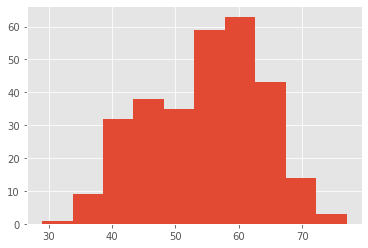

In [8]:
df['age'].hist();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


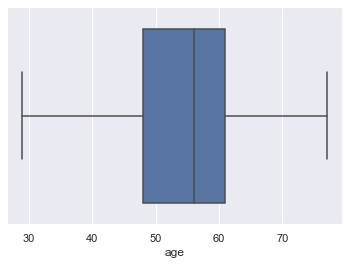

In [12]:
sns.boxplot(df['age']);

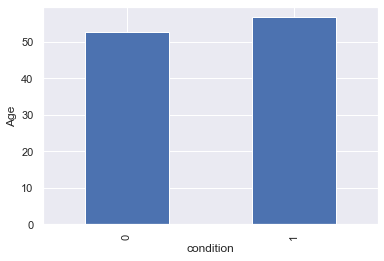

In [14]:
df.groupby('condition')['age'].mean().plot(kind='bar') 
plt.ylabel('Age')
plt.show();

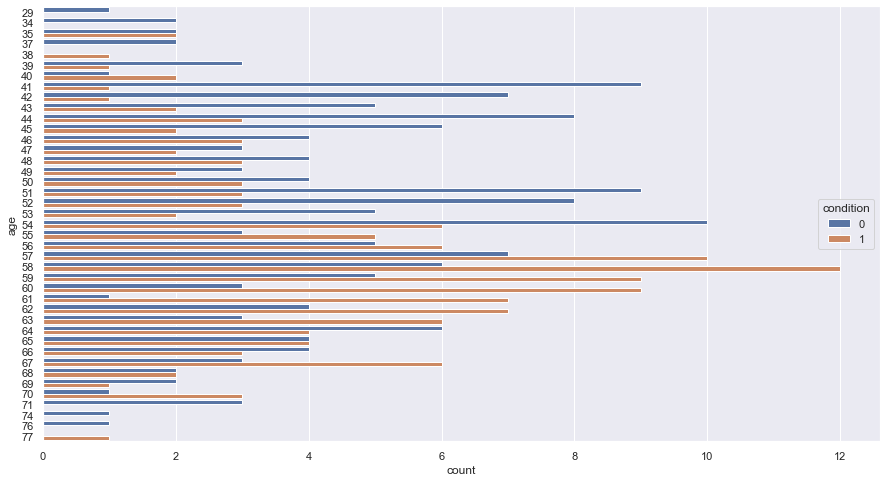

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(y='age', hue='condition', data=df);

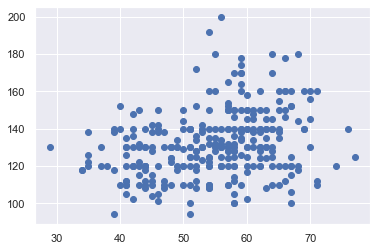

In [17]:
plt.scatter(df['age'], df['trestbps']);

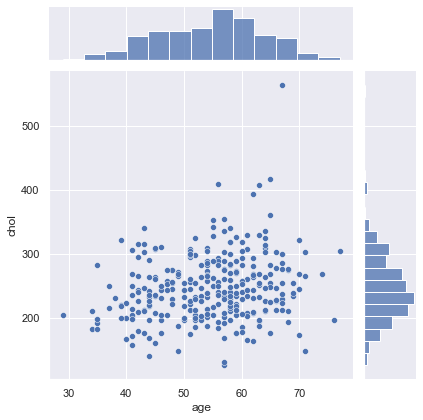

In [18]:
sns.jointplot(x='age', y='chol', data=df);

In [19]:
df.pivot_table(values=['age', 'sex'], index=['trestbps', 'restecg'], aggfunc='mean')

age   sex
trestbps restecg             
94       0       45.000 0.500
100      0       54.500 1.000
         2       62.500 0.500
101      0       46.000 1.000
102      0       60.000 0.000
...                 ...   ...
180      0       64.000 0.000
         1       55.000 0.000
         2       68.000 1.000
192      2       54.000 1.000
200      2       56.000 0.000

[83 rows x 2 columns]

In [20]:
pd.crosstab(df['trestbps'], df['restecg'])

restecg,0,1,2
trestbps,,,
94,2,0,0
100,2,0,2
101,1,0,0
102,1,0,1
104,0,0,1
105,2,0,1
106,1,0,0
108,5,0,1
110,9,0,10


In [21]:
df[df['condition'] == 1]['age'].mean()

56.75912408759124